# IMP Event Log

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system. Information was anonymized for privacy.


Number of instances: 141,712 events (24,918 incidents)
Number of attributes: 36 attributes (1 case identifier, 1 state identifier, 32 descriptive attributes, 2 dependent variables)

The attributed â€˜closed_atâ€™ is used to determine the dependent variable for the time completion prediction task. The attribute â€˜resolved_atâ€™ is highly correlated with â€˜closed_atâ€™. In this event log, some rows may have the same values (they are equal) since not all attributes involved in the real-world process are present in the log.

Attributes used to record textual information are not placed in this log.

The missing values should be considered â€˜unknown informationâ€™.

Attribute Information:

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1 High; 2 Medium; 3 Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1 High; 2 Medium; 3 Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).



Relevant Papers:

Amaral, C. A. L., Fantinato, M., Reijers, H. A., Peres, S. M., Enhancing Completion Time Prediction Through Attribute Selection. Proceedings of the 15th International Conference on Advanced Information Technologies for Management (AITM 2018) and 13th International Conference on Information Systems Management (ISM 2018), Revised Selected Papers â€“ Lecture Notes in Business Information Processing, v. 346, pp. 3-23, 2019. 

Amaral, C. A. L., Fantinato, M., Peres, S. M., Attribute Selection with Filter and Wrapper: An Application on Incident Management Process. Proceedings of the 14th Federated Conference on Computer Science and Information Systems (FedCSIS 2018), pp. 679-682, 2018. 

Maita, A. R. C., Martins, L. C., Paz, C. R. L., Rafferty, L., Hung, P., Peres, S. M., Fantinato, M. A systematic mapping study of process mining. Enterprise Information Systems, v. 12, n. 5, pp. 505-549, 2018. 



## Importing relevant Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



## Importing the dataset

In [3]:
data = pd.read_csv('incident_event_log.csv')

## Getting to know Dataset Nature

In [4]:
data.head(20)  

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [5]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


reassignment_count: number of times the incident has the group or the support analysts changed;

reopen_count: number of times the incident resolution was rejected by the caller;

sys_mod_count: number of incident updates until that moment;

made_sla: boolean attribute that shows whether the incident exceeded the target SLA;

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [7]:
print(data.isnull().sum()) 

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [8]:
#incident state: eight levels controlling the incident management process transitions from opening until closing the case;
incident_state  = data['incident_state'].value_counts(ascending=False)

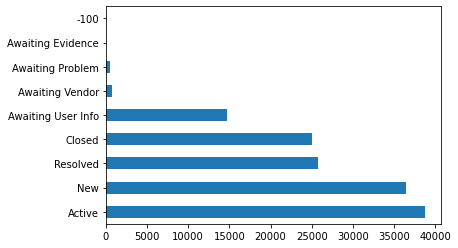

In [9]:
x_incident_state = incident_state.iloc[:15].plot(kind='barh')

In [10]:
incident_state

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

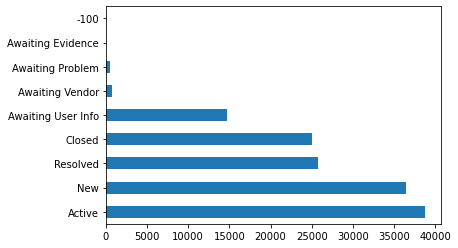

In [11]:
x_incident_state = incident_state.iloc[:15].plot(kind='barh')

In [12]:
data.value_counts("made_sla")

made_sla
True     132497
False      9215
dtype: int64

### Selecting all columns that is known as a new job.

In [13]:
COLS = ['incident_state','contact_type','location','category','subcategory','u_symptom','impact','urgency','assignment_group','vendor','made_sla']

In [14]:
data_sla = data[COLS]

In [15]:
resolved_incidents_sla = data_sla[data_sla['incident_state'] == 'Closed']

In [16]:
resolved_incidents_sla.head()

,incident_state,contact_type,location,category,subcategory,u_symptom,impact,urgency,assignment_group,vendor,made_sla
3,Closed,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,Group 56,?,True
12,Closed,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,Group 24,?,True
19,Closed,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,2 - Medium,2 - Medium,Group 70,?,True
23,Closed,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,2 - Medium,2 - Medium,Group 25,?,True
31,Closed,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,1 - High,2 - Medium,Group 23,?,False


In [17]:
data_processed_drop_nan_sla = resolved_incidents_sla[resolved_incidents_sla['location'] != "?"]

In [18]:
data_processed_drop_nan_sla = data_processed_drop_nan_sla[data_processed_drop_nan_sla['category'] != "?"]

In [19]:
data_processed_drop_nan_sla = data_processed_drop_nan_sla[data_processed_drop_nan_sla['u_symptom'] != "?"]

In [189]:
data_processed_drop_nan_sla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19129 entries, 3 to 141711
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   incident_state    19129 non-null  object
 1   contact_type      19129 non-null  object
 2   location          19129 non-null  object
 3   category          19129 non-null  object
 4   subcategory       19129 non-null  object
 5   u_symptom         19129 non-null  object
 6   impact            19129 non-null  object
 7   urgency           19129 non-null  object
 8   assignment_group  19129 non-null  object
 9   vendor            19129 non-null  object
 10  made_sla          19129 non-null  bool  
dtypes: bool(1), object(10)
memory usage: 1.6+ MB


In [190]:
data_processed_drop_nan_sla.value_counts("made_sla")

made_sla
True     12561
False     6568
dtype: int64

### Barh charts on value counts

In [20]:
location  = data_processed_drop_nan_sla['location'].value_counts(ascending=False)

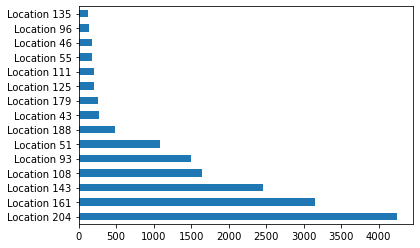

In [21]:
x_location = location.iloc[:15].plot(kind='barh')

In [22]:
category = data_processed_drop_nan_sla['category'].value_counts(ascending=False)

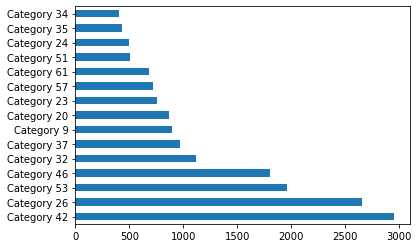

In [23]:
x_category = category.iloc[:15].plot(kind='barh')

In [177]:
category = data_processed_drop_nan_sla['assignment_group'].value_counts(ascending=False)

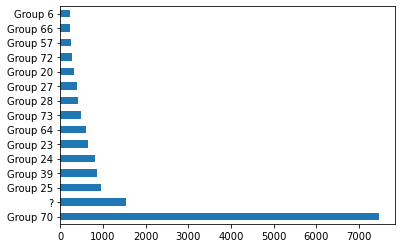

In [178]:
x_assignment_group = category.iloc[:15].plot(kind='barh')

In [151]:
cols = ['category']

data_sla[cols] = data_sla[cols].replace({'Category ':''}, regex = True) 

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [202]:
data_sla.value_counts("vendor")

vendor
?           141468
code 8s        167
Vendor 1        69
Vendor 3         6
Vendor 2         2
dtype: int64

In [203]:
data_sla.value_counts("assignment_group")

assignment_group
Group 70    43474
?           14213
Group 25     7679
Group 24     6752
Group 20     6170
            ...  
Group 41        3
Group 38        2
Group 16        1
Group 4         1
Group 11        1
Length: 79, dtype: int64

In [204]:
data_sla.value_counts("category")

category
26    18453
42    15977
53    15968
46    13324
23     7779
9      7365
32     7273
37     6584
57     6532
20     5506
61     5168
24     4561
34     3946
40     3760
45     3619
51     2390
28     2256
35     2037
44     1798
19     1592
13      994
43      858
55      801
17      512
22      420
56      322
38      290
8       264
7       207
33      160
54      139
50       93
31       92
63       78
?        78
2        77
21       69
47       50
59       42
41       36
29       32
5        31
25       30
62       25
10       24
4        22
52       16
30       15
48       10
6         7
16        7
58        5
14        5
12        3
15        3
49        2
36        2
27        2
3         1
dtype: int64

In [205]:
data_sla.value_counts("location")

location
204    31690
161    22605
143    19245
108    12623
93     11554
       ...  
141        3
211        3
166        2
132        2
31         2
Length: 225, dtype: int64

In [206]:
predict = data_sla[data_sla['category'] != '?']

In [153]:
predict = data_sla[data_sla['location'] != '?']

In [154]:
predict = data_sla[data_sla['assignment_group'] != '?']

In [155]:
predict = data_sla[data_sla['vendor'] != '?']

In [156]:
predict

,incident_state,contact_type,location,category,subcategory,u_symptom,impact,urgency,assignment_group,vendor,made_sla
7857,Awaiting Vendor,Phone,204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
7858,Awaiting Vendor,Phone,204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
9086,Awaiting Vendor,Phone,204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9087,Awaiting Vendor,Phone,204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9088,Awaiting Vendor,Phone,204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
...,...,...,...,...,...,...,...,...,...,...,...
137209,Active,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137210,Awaiting Vendor,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137211,Awaiting Vendor,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137212,Resolved,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True


In [157]:
predict.vendor.unique()

array(['code 8s', 'Vendor 3', 'Vendor 2', 'Vendor 1'], dtype=object)

In [160]:
cols = ['location']

data_sla[cols] = data_sla[cols].replace({'Location ':''}, regex = True) 

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [163]:
predict

,incident_state,contact_type,location,category,subcategory,u_symptom,impact,urgency,assignment_group,vendor,made_sla
7857,Awaiting Vendor,Phone,204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
7858,Awaiting Vendor,Phone,204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
9086,Awaiting Vendor,Phone,204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9087,Awaiting Vendor,Phone,204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9088,Awaiting Vendor,Phone,204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
...,...,...,...,...,...,...,...,...,...,...,...
137209,Active,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137210,Awaiting Vendor,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137211,Awaiting Vendor,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137212,Resolved,Phone,204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True


In [164]:
predict.value_counts("made_sla")

made_sla
True     234
False     10
dtype: int64

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [166]:

df2 = pd.DataFrame(np.random.rand(10, 3), columns=["location", "assignment_group", "impact",])

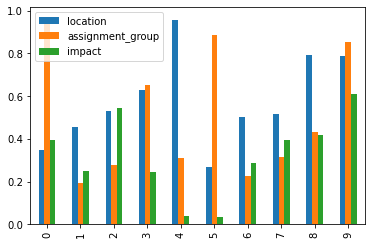

In [167]:
df2.plot.bar();

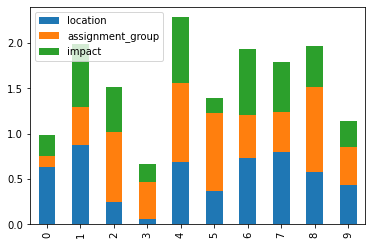

In [139]:
df2.plot.bar(stacked=True);

In [175]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["location", "assignment_group", "impact","made_sla"], columns=["x", "y"]
)

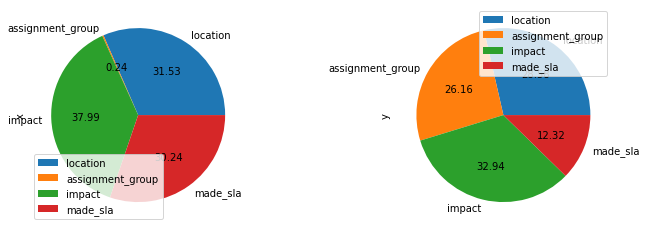

In [176]:
df.plot.pie(subplots=True, figsize=(12, 4),autopct="%.2f");

## Spliting Data to Train and Test

### CatBoostClassifier

In [94]:
X = data_processed_drop_nan_sla.drop(['made_sla'], axis=1)
y = data_processed_drop_nan_sla.made_sla

In [95]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234, stratify=y)


https://stackoverflow.com/questions/60648547/how-to-increase-accuracy-of-model-using-catboost

https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

In [96]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]


In [108]:
 best_params = {
            'bagging_temperature': 0.5,
            'depth': 12,
            'iterations': 600,
            'learning_rate': 0.1,
            'sampling_frequency': 'PerTreeLevel',
            'leaf_estimation_method': 'Gradient',
            'random_strength': 0.8,
            'l2_leaf_reg': 50,
            'max_ctr_complexity': 2,
            'fold_len_multiplier': 2, 
            'eval_metric': 'AUC'
     
    }

In [109]:

model=CatBoostClassifier(**best_params)
model.fit(X_train, y_train, cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7583703	best: 0.7583703 (0)	total: 114ms	remaining: 1m 8s
1:	test: 0.7755424	best: 0.7755424 (1)	total: 307ms	remaining: 1m 31s
2:	test: 0.7873101	best: 0.7873101 (2)	total: 643ms	remaining: 2m 7s
3:	test: 0.7868690	best: 0.7873101 (2)	total: 777ms	remaining: 1m 55s
4:	test: 0.7898075	best: 0.7898075 (4)	total: 3.62s	remaining: 7m 10s
5:	test: 0.7951051	best: 0.7951051 (5)	total: 3.81s	remaining: 6m 16s
6:	test: 0.7995564	best: 0.7995564 (6)	total: 5.67s	remaining: 8m
7:	test: 0.8012197	best: 0.8012197 (7)	total: 7.5s	remaining: 9m 14s
8:	test: 0.8085644	best: 0.8085644 (8)	total: 9.53s	remaining: 10m 26s
9:	test: 0.8110442	best: 0.8110442 (9)	total: 11.3s	remaining: 11m 9s
10:	test: 0.8130535	best: 0.8130535 (10)	total: 11.7s	remaining: 10m 25s
11:	test: 0.8148713	best: 0.8148713 (11)	total: 13.9s	remaining: 11m 22s
12:	test: 0.8161501	best: 0.8161501 (12)	total: 15.9s	remaining: 11m 56s
13:	test: 0.8169093	best: 0.8169093 (13)	total: 17.8s	remaining: 12m 25s
14:	test: 0.81

113:	test: 0.8282106	best: 0.8285674 (83)	total: 3m 3s	remaining: 13m
114:	test: 0.8282016	best: 0.8285674 (83)	total: 3m 4s	remaining: 12m 59s
115:	test: 0.8282470	best: 0.8285674 (83)	total: 3m 6s	remaining: 12m 59s
116:	test: 0.8281534	best: 0.8285674 (83)	total: 3m 8s	remaining: 12m 58s
117:	test: 0.8281599	best: 0.8285674 (83)	total: 3m 10s	remaining: 12m 58s
118:	test: 0.8281129	best: 0.8285674 (83)	total: 3m 12s	remaining: 12m 57s
119:	test: 0.8280878	best: 0.8285674 (83)	total: 3m 14s	remaining: 12m 56s
120:	test: 0.8280042	best: 0.8285674 (83)	total: 3m 15s	remaining: 12m 55s
121:	test: 0.8279948	best: 0.8285674 (83)	total: 3m 17s	remaining: 12m 54s
122:	test: 0.8279833	best: 0.8285674 (83)	total: 3m 19s	remaining: 12m 53s
123:	test: 0.8277956	best: 0.8285674 (83)	total: 3m 21s	remaining: 12m 52s
124:	test: 0.8277449	best: 0.8285674 (83)	total: 3m 23s	remaining: 12m 51s
125:	test: 0.8276952	best: 0.8285674 (83)	total: 3m 24s	remaining: 12m 50s
126:	test: 0.8276841	best: 0.8285

223:	test: 0.8255971	best: 0.8285674 (83)	total: 7m	remaining: 11m 46s
224:	test: 0.8252575	best: 0.8285674 (83)	total: 7m 3s	remaining: 11m 46s
225:	test: 0.8252329	best: 0.8285674 (83)	total: 7m 6s	remaining: 11m 45s
226:	test: 0.8252287	best: 0.8285674 (83)	total: 7m 9s	remaining: 11m 45s
227:	test: 0.8251849	best: 0.8285674 (83)	total: 7m 12s	remaining: 11m 45s
228:	test: 0.8250349	best: 0.8285674 (83)	total: 7m 15s	remaining: 11m 45s
229:	test: 0.8250275	best: 0.8285674 (83)	total: 7m 18s	remaining: 11m 45s
230:	test: 0.8249190	best: 0.8285674 (83)	total: 7m 21s	remaining: 11m 45s
231:	test: 0.8249225	best: 0.8285674 (83)	total: 7m 24s	remaining: 11m 44s
232:	test: 0.8248196	best: 0.8285674 (83)	total: 7m 26s	remaining: 11m 43s
233:	test: 0.8246819	best: 0.8285674 (83)	total: 7m 29s	remaining: 11m 43s
234:	test: 0.8244403	best: 0.8285674 (83)	total: 7m 32s	remaining: 11m 42s
235:	test: 0.8243660	best: 0.8285674 (83)	total: 7m 35s	remaining: 11m 42s
236:	test: 0.8244464	best: 0.828

333:	test: 0.8234325	best: 0.8285674 (83)	total: 12m 20s	remaining: 9m 49s
334:	test: 0.8234239	best: 0.8285674 (83)	total: 12m 23s	remaining: 9m 48s
335:	test: 0.8233742	best: 0.8285674 (83)	total: 12m 26s	remaining: 9m 46s
336:	test: 0.8234140	best: 0.8285674 (83)	total: 12m 29s	remaining: 9m 44s
337:	test: 0.8234614	best: 0.8285674 (83)	total: 12m 31s	remaining: 9m 42s
338:	test: 0.8234505	best: 0.8285674 (83)	total: 12m 34s	remaining: 9m 41s
339:	test: 0.8234826	best: 0.8285674 (83)	total: 12m 37s	remaining: 9m 39s
340:	test: 0.8235189	best: 0.8285674 (83)	total: 12m 41s	remaining: 9m 38s
341:	test: 0.8235312	best: 0.8285674 (83)	total: 12m 44s	remaining: 9m 36s
342:	test: 0.8234898	best: 0.8285674 (83)	total: 12m 46s	remaining: 9m 34s
343:	test: 0.8235240	best: 0.8285674 (83)	total: 12m 49s	remaining: 9m 32s
344:	test: 0.8235713	best: 0.8285674 (83)	total: 12m 52s	remaining: 9m 31s
345:	test: 0.8235728	best: 0.8285674 (83)	total: 12m 55s	remaining: 9m 29s
346:	test: 0.8233813	best

443:	test: 0.8222078	best: 0.8285674 (83)	total: 17m 24s	remaining: 6m 6s
444:	test: 0.8221837	best: 0.8285674 (83)	total: 17m 26s	remaining: 6m 4s
445:	test: 0.8222768	best: 0.8285674 (83)	total: 17m 29s	remaining: 6m 2s
446:	test: 0.8222920	best: 0.8285674 (83)	total: 17m 31s	remaining: 6m
447:	test: 0.8221402	best: 0.8285674 (83)	total: 17m 34s	remaining: 5m 57s
448:	test: 0.8221858	best: 0.8285674 (83)	total: 17m 37s	remaining: 5m 55s
449:	test: 0.8221466	best: 0.8285674 (83)	total: 17m 39s	remaining: 5m 53s
450:	test: 0.8221724	best: 0.8285674 (83)	total: 17m 42s	remaining: 5m 50s
451:	test: 0.8221392	best: 0.8285674 (83)	total: 17m 44s	remaining: 5m 48s
452:	test: 0.8220732	best: 0.8285674 (83)	total: 17m 47s	remaining: 5m 46s
453:	test: 0.8220387	best: 0.8285674 (83)	total: 17m 49s	remaining: 5m 44s
454:	test: 0.8220907	best: 0.8285674 (83)	total: 17m 52s	remaining: 5m 41s
455:	test: 0.8220401	best: 0.8285674 (83)	total: 17m 55s	remaining: 5m 39s
456:	test: 0.8220624	best: 0.828

553:	test: 0.8211451	best: 0.8285674 (83)	total: 22m 3s	remaining: 1m 49s
554:	test: 0.8211372	best: 0.8285674 (83)	total: 22m 5s	remaining: 1m 47s
555:	test: 0.8211809	best: 0.8285674 (83)	total: 22m 8s	remaining: 1m 45s
556:	test: 0.8212085	best: 0.8285674 (83)	total: 22m 10s	remaining: 1m 42s
557:	test: 0.8212518	best: 0.8285674 (83)	total: 22m 13s	remaining: 1m 40s
558:	test: 0.8211953	best: 0.8285674 (83)	total: 22m 15s	remaining: 1m 37s
559:	test: 0.8211729	best: 0.8285674 (83)	total: 22m 18s	remaining: 1m 35s
560:	test: 0.8213035	best: 0.8285674 (83)	total: 22m 20s	remaining: 1m 33s
561:	test: 0.8212999	best: 0.8285674 (83)	total: 22m 23s	remaining: 1m 30s
562:	test: 0.8212104	best: 0.8285674 (83)	total: 22m 25s	remaining: 1m 28s
563:	test: 0.8212306	best: 0.8285674 (83)	total: 22m 28s	remaining: 1m 26s
564:	test: 0.8212217	best: 0.8285674 (83)	total: 22m 30s	remaining: 1m 23s
565:	test: 0.8212316	best: 0.8285674 (83)	total: 22m 33s	remaining: 1m 21s
566:	test: 0.8211328	best: 0

In [110]:
pred = model.predict(X_validation)

In [111]:
pred_bool = (pred == 'True')

In [112]:
true_y = np.array(y_validation.to_list())

In [113]:
true_y

array([ True,  True,  True, ..., False,  True,  True])

In [199]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",accuracy_score(true_y, pred_bool))
print("Precision_score:",precision_score(true_y, pred_bool))
print("Recall_score:",recall_score(true_y, pred_bool))
print("f1_score:",f1_score(true_y, pred_bool))

Accuracy_score: 0.7576232793169542
Precision_score: 0.7909424724602203
Recall_score: 0.857484076433121
f1_score: 0.8228702406723546


<AxesSubplot:>

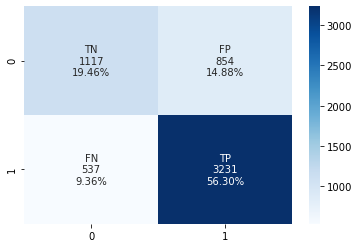

In [118]:
cf_matrix = confusion_matrix(true_y, pred_bool)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

### Spliting Data to Train and Test

In [208]:
dummy_svm = pd.get_dummies(data_processed_drop_nan_sla)

In [209]:
X_svm = dummy_svm.drop(['made_sla'], axis=1)
y_svm = dummy_svm.made_sla

In [210]:
X_train_svm, X_validation_svm, y_train_svm, y_validation_svm = train_test_split(X_svm, y_svm, train_size=0.7, random_state=1234, stratify=y_svm)


### svm Classifier

In [211]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel


In [212]:
#Train the model using the training sets
clf.fit(X_train_svm, y_train_svm)


SVC(kernel='linear')

In [213]:
#Predict the response for test dataset
y_pred = clf.predict(X_validation_svm)

In [214]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation_svm, y_pred))

Accuracy: 0.745600278794215


In [215]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))

Accuracy_score: 0.745600278794215
Precision_score: 0.8009911319770475
Recall_score: 0.8150212314225053
f1_score: 0.8079452775585373


<AxesSubplot:>

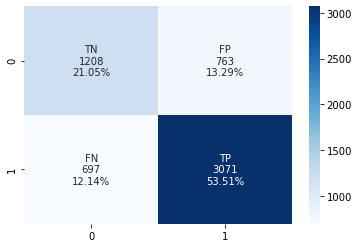

In [216]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Random Forest Model(Gaussian Classifier)

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [217]:
#Create a Gaussian Classifier
RF_clf=RandomForestClassifier(n_estimators=80)

In [218]:
#Train the model using the training sets y_pred=clf.predict(X_test)
RF_clf.fit(X_train_svm,y_train_svm)

RandomForestClassifier(n_estimators=80)

In [219]:
y_pred=RF_clf.predict(X_validation_svm)

In [220]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))


Accuracy_score: 0.7518731486321659
Precision_score: 0.7864125122189638
Recall_score: 0.8540339702760085
f1_score: 0.8188295165394401


<AxesSubplot:>

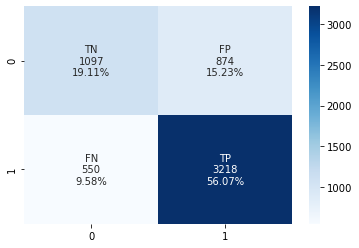

In [221]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Decision Tree Classifier

In [222]:
# Create Decision Tree classifer object
DT_clf = DecisionTreeClassifier()

In [223]:
# Train Decision Tree Classifer
DT_clf = clf.fit(X_train_svm,y_train_svm)

In [224]:
#Predict the response for test dataset
y_pred = DT_clf.predict(X_validation_svm)

In [225]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation_svm, y_pred))

Accuracy: 0.745600278794215


In [226]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))

Accuracy_score: 0.745600278794215
Precision_score: 0.8009911319770475
Recall_score: 0.8150212314225053
f1_score: 0.8079452775585373


<AxesSubplot:>

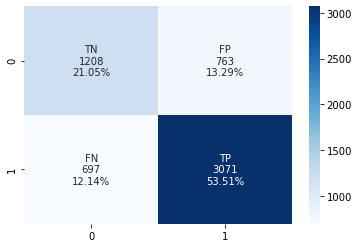

In [227]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Data cleansing

## Creating a method to check for values in the list

## Predicting and Evaluating the dataset

https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca

In [58]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [59]:
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

In [60]:
# Define the models evaluation function
def models_evaluation(X_train_svm,y_train_svm):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''

### Perform cross-validation to each machine learning classifier

In [61]:
  log = cross_validate(log_model, X_train_svm,y_train_svm, scoring=scoring)

In [62]:
  svc = cross_validate(svc_model, X_train_svm,y_train_svm, scoring=scoring)

In [63]:
dtr = cross_validate(dtr_model, X_train_svm,y_train_svm, scoring=scoring)

In [64]:
rfc = cross_validate(rfc_model,X_train_svm,y_train_svm, scoring=scoring)

In [65]:
gnb = cross_validate(gnb_model, X_train_svm,y_train_svm, scoring=scoring)

In [95]:
# Create a data frame with the models perfoamnce metrics scores
models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
     
    
    # Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    
  

    
   

In [96]:
models_scores_table

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.741748,0.740777,0.715161,0.733308,0.712099,Logistic Regression
Precision,0.774825,0.773658,0.777016,0.775239,0.734361,Decision Tree
Recall,0.855339,0.855566,0.794154,0.836459,0.880697,Gaussian Naive Bayes
F1 Score,0.813069,0.812528,0.785449,0.804625,0.800692,Logistic Regression
